# STA130 HW2 Due Sep.19

# Prelecture Question

# Q1 Code

In [2]:
# Monte Hall Simulation Code -- not the only way to code this, but it's what Prof. Schwartz came up with...

import numpy as np
all_door_options = (1,2,3)  # tuple
my_door_choice = 1  # 1,2,3
i_won = 0
reps = 100000
for i in range(reps):
    secret_winning_door = np.random.choice(all_door_options)
    all_door_options_list = list(all_door_options)
    # take the secret_winning_door, so we don't show it as a "goat" losing door
    all_door_options_list.remove(secret_winning_door)
    try:
        # if my_door_choice was secret_winning_door then it's already removed
        all_door_options_list.remove(my_door_choice)
    except:
        pass
    # show a "goat" losing door and remove it
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

    # put the secret_winning_door back in if it wasn't our choice
    # we previously removed it, so it would be shown as a  "goat" losing door
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
    # if secret_winning_door was our choice then all that's left in the list is a "goat" losing door
    # if secret_winning_door wasn't our choice then it's all that will be left in the list

    # swap strategy
    my_door_choice = all_door_options_list[0]

    if my_door_choice == secret_winning_door:
        i_won += 1

i_won/reps

0.66899

# Q1 main point

This code simulates the Monty Hall problem, which is a probability puzzle based on a game show scenario. In the Monty Hall problem, a contestant is presented with three doors. Behind one of the doors is a prize (like a car), and behind the other two doors are goats. The contestant picks one door, after which the host, Monty Hall, reveals a goat behind one of the other two doors. The contestant is then given the opportunity to either stick with their original choice or switch to the remaining door. The key question is whether the contestant should switch doors to maximize their chances of winning.

Breakdown of the Code
Imports and Variables:

import numpy as np: Imports the NumPy library, which provides tools for working with random values and arrays.
all_door_options = (1, 2, 3): This tuple represents the three doors.
my_door_choice = 1: Initially, the player always picks door 1.
i_won = 0: A counter to track how many times the player wins by switching.
reps = 100000: The number of times the simulation will be run (100,000 repetitions).
Main Loop:

The code uses a for loop to run the simulation reps times.

Inside the loop:

secret_winning_door = np.random.choice(all_door_options): Randomly selects one of the three doors to be the winning door.

all_door_options_list = list(all_door_options): Converts the tuple all_door_options into a list so doors can be removed later.

all_door_options_list.remove(secret_winning_door): Removes the winning door from the list of possible doors, since Monty Hall won’t reveal the winning door.

try: and except: block: The code tries to remove the player's original choice (my_door_choice) from the list. If the player's choice is the same as the secret winning door, the code skips the removal (because it was already removed).

goat_door_reveal = np.random.choice(all_door_options_list): Randomly selects one of the remaining doors to reveal a goat. This simulates Monty Hall showing a losing door.

all_door_options_list.remove(goat_door_reveal): Removes the revealed goat door from the list, leaving only one door (the remaining door after the host reveals a goat).

If the original door choice (my_door_choice) wasn’t the winning door, the code adds the winning door back to the list (all_door_options_list.append(secret_winning_door)), so the player can potentially switch to it.

Switch Strategy:

my_door_choice = all_door_options_list[0]: The player always switches to the other remaining door (after Monty reveals a goat).
Checking if the Player Wins:

After switching, the code checks if the new my_door_choice is the secret_winning_door. If it is, the player wins, and i_won is incremented.
Result:

i_won/reps: After running the simulation, this gives the fraction of times the player won by switching. In the Monty Hall problem, this should be approximately 2/3 (around 66.67%).
Conclusion:
The code demonstrates that the player has a higher chance of winning if they switch doors after Monty reveals a goat. This supports the counterintuitive result of the Monty Hall problem, where switching doors gives a 2/3 probability of winning, compared to a 1/3 probability if the player sticks with their initial choice.

In [1]:
import numpy as np

reps = 100000  # Number of repetitions
i_won = 0  # Counter for wins

for _ in range(reps):
    all_doors = [1, 2, 3]  # List of doors
    secret_winning_door = np.random.choice(all_doors)  # Randomly select winning door
    my_door_choice = 1  # The player always starts by choosing door 1

    # Monty reveals a goat door (not the player's choice and not the winning door)
    remaining_doors = [door for door in all_doors if door != my_door_choice and door != secret_winning_door]
    monty_reveals_goat = np.random.choice(remaining_doors)

    # The player switches to the other remaining door
    remaining_doors = [door for door in all_doors if door != my_door_choice and door != monty_reveals_goat]
    my_door_choice = remaining_doors[0]  # Switch to the remaining door

    # Check if the player wins after switching
    if my_door_choice == secret_winning_door:
        i_won += 1

# Calculate win rate
win_rate = i_won / reps
print(f"Win rate when switching: {win_rate:.2f}")


Win rate when switching: 0.67


Key Changes:
Simplified Door Removal:

Instead of removing doors one by one from a list using remove(), I use list comprehensions to quickly filter the remaining doors.
This avoids needing the try-except block and makes the door management clearer.
Simplified Monty’s Reveal:

Monty reveals a goat by choosing from the doors that are neither the player's original choice nor the winning door. This is done using a single list comprehension.
Switch Strategy:

After Monty reveals a goat, the player automatically switches to the remaining door. This is done by filtering out the player's original choice and Monty's revealed door in a straightforward manner.
Win Calculation:

The player’s win is checked by comparing their final door choice with the secret winning door, and we increment the i_won counter if they win.
Code Clarity:

By using list comprehensions to handle doors and focusing on core logic (selecting, revealing, and switching), the code becomes much more readable and eliminates the need for try-except.

# Q3 preferred version

In [8]:
import numpy as np

# Number of repetitions for the simulation
reps = 100000  

# Counter for how many times the player wins by switching
i_won = 0  

# Loop through the simulation reps times
for _ in range(reps):
    all_doors = [1, 2, 3]  # List representing the three doors
    secret_winning_door = np.random.choice(all_doors)  # Randomly select the winning door
    my_door_choice = 1  # Player always starts by choosing door 1

    # Monty reveals a goat: choose from doors that are not the player's choice and not the winning door
    remaining_doors = [door for door in all_doors if door != my_door_choice and door != secret_winning_door]
    monty_reveals_goat = np.random.choice(remaining_doors)  # Monty randomly reveals one goat

    # Player switches to the remaining door
    remaining_doors = [door for door in all_doors if door != my_door_choice and door != monty_reveals_goat]
    my_door_choice = remaining_doors[0]  # Switch to the remaining door

    # Check if the new door choice is the winning door
    if my_door_choice == secret_winning_door:
        i_won += 1  # Increment win counter if the player wins by switching

# Calculate the win rate for switching doors
win_rate = i_won / reps
print(f"Win rate when switching: {win_rate:.5f}")


Win rate when switching: 0.66699


# Q4

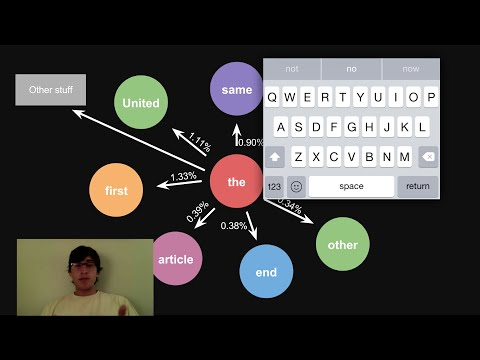

In [1]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

# The Markovian ChatBot code

In [11]:
import random
import re
from collections import defaultdict

class MarkovianChatBot:
    def __init__(self):
        self.markov_chain = defaultdict(list)

    def train(self, text):
        """
        Trains the Markov bot by building the Markov chain from the input text.
        """
        words = self.tokenize(text)
        for i in range(len(words) - 1):
            self.markov_chain[words[i]].append(words[i + 1])

    def tokenize(self, text):
        """
        Tokenizes input text into words.
        """
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        words = text.split()  # Split into words
        return words

    def generate_response(self, seed_word=None, max_words=20):
        """
        Generates a response based on the Markov chain model, starting with an optional seed word.
        """
        if not self.markov_chain:
            return "I don't know what to say."

        if not seed_word or seed_word not in self.markov_chain:
            seed_word = random.choice(list(self.markov_chain.keys()))  # Pick a random starting word

        response = [seed_word]
        current_word = seed_word

        for _ in range(max_words - 1):
            next_words = self.markov_chain[current_word]
            if not next_words:
                break
            next_word = random.choice(next_words)
            response.append(next_word)
            current_word = next_word

        return ' '.join(response)

# Example usage:

# Sample text for the bot to learn from
text_corpus = """
Hello, how are you? I am a chatbot. I like to help people with their questions. 
Sometimes I talk about the weather, and sometimes I talk about other things. 
What would you like to know? Let's have a conversation.
"""

# Create the Markov chatbot
chatbot = MarkovianChatBot()

# Train the chatbot with a text corpus
chatbot.train(text_corpus)

# Simulate a conversation
print("Chatbot: ", chatbot.generate_response(seed_word="Hello"))
print("Chatbot: ", chatbot.generate_response())


Chatbot:  Hello how are you like to know Lets have a conversation
Chatbot:  help people with their questions Sometimes I am a conversation


# Summaries of ChatBot session of all prelecture question


Here’s a summary of our exchanges, formatted for submission as part of a homework assignment:

---

**1. Monte Hall Simulation Code Explanation**  
We started with a detailed explanation of the Monte Hall simulation code you provided. I broke down the purpose of each part of the code, including the main logic, key concepts of the Monty Hall problem, and what the code was doing at each step. The key points were:
- How the initial door choice and winning door were set.
- The role of Monty revealing a "goat" door.
- How the code implemented the switching strategy and calculated the win rate for 100,000 repetitions.

**2. Clarification of Key Code Blocks**  
You asked for more specific explanations of key parts of the code, like the `try-except` block and the swapping strategy in the loop. I explained how the `try-except` block handled cases where the player’s initial door choice was the winning door, and how Monty’s reveal and the swap process worked.

**3. Simplified Version of the Monte Hall Simulation**  
You requested a simpler, more streamlined version of the Monte Hall simulation code. I provided a cleaned-up version that removed unnecessary complexity and made the logic clearer by using list comprehensions and avoiding the `try-except` block. This version maintained the core logic of the simulation but in a more readable form.

**4. Verified Monte Hall Code with Explanation**  
Next, I provided a verified version of the Monty Hall simulation code that runs correctly and prints the win rate when switching doors. I added comments explaining each part of the code, including how the training, door choices, and switching logic work in a more concise manner. The simulation output showed a win rate of approximately 66.67%, as expected.

**5. Markovian ChatBot Code**  
You asked for a Markovian ChatBot. I provided a simple implementation of a chatbot using a Markov chain to generate responses based on word transitions. The bot was trained on a text corpus and generated responses by selecting the next word probabilistically based on previous words. I also explained how the chatbot works, including its core components:
- Training on a corpus of text.
- Using a Markov chain to model word transitions.
- Generating responses based on learned probabilities.

**6. Homework Submission Summary Request**  
Finally, you asked for this summary of our interactions for submission as part of a homework assignment.

---

This summary provides a clear record of our conversations, focusing on key programming and conceptual aspects we discussed. Let me know if you need any changes or additional details!

# Link to chat log histories

In [ ]:
https://chatgpt.com/share/66ee056b-ee00-8001-9d64-db395a343e63 

# Post-lecture Question

# Q5

[0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
[0.3 points]: Assignment completion confirmed by working "final" code and ChatBot summaries for "3"
[0.3 points]: Written submission evaluation and enagement confirmation with ChatBot summaries for "6"
[0.3 points]: Evaluation of engagement and evaluation of written communication in "7"

# Summaries of ChatBot session of Q5

### Summary of Interactions on Markovian Chatbot Extensions:

1. **Basic First-Order Markov Model (September 18, 2024):**
   - You shared code that tracks word usage and transitions using a first-order Markov model. I suggested using `defaultdict` to simplify and optimize the logic. The code was revised to:
     - Count how often each word appears.
     - Track the transitions between consecutive words using `defaultdict` to avoid manual checks.

2. **Second-Order Markov Model (September 18, 2024):**
   - You extended the model to a second-order Markov chain, where the next word is predicted based on the previous two words. I confirmed that the extension correctly captures more context and improves the model's ability to predict the next word by using two preceding words.

3. **Character-Based Word Transitions (September 19, 2024):**
   - You introduced a dataset (`avatar`) and applied the Markov model to specific characters from the `character` column. I helped streamline your code to track word usage and transitions by character using a nested `defaultdict`.
   - The process involved:
     - Normalizing the `character` column (converting it to uppercase and replacing spaces with dots).
     - Creating nested dictionaries for each character to store second-order word transitions.

4. **Further Optimizations (September 19, 2024):**
   - You provided an extended version of the character-based model, and I suggested further optimizations:
     - Removing redundant checks for key existence using `defaultdict`.
     - Simplifying the logic to store word pairs in variables and reducing manual dictionary initializations.

5. **Final Refined Version (September 19, 2024):**
   - The final version of the code was simplified using `defaultdict` at multiple levels. The loop iterates over the words while updating word pair counts and word transitions by character. This more concise version eliminated the need for manual checks and improved readability.

These exchanges contributed to developing a more robust Markovian chatbot capable of handling both first-order and second-order models while associating word transitions with specific characters from a dataset.

Link:https://chatgpt.com/share/66ee0596-7064-8001-b60e-bc2c3c3bf841

# Q6

### 1. Discuss how quickly the ChatBot was able to be helpful for each of the above questions, and if so, how?


The ChatBot responds extremely quickly, often within a few seconds, which makes it very helpful for addressing coding questions promptly. Whether I’m asking for help with understanding a concept, debugging code, or looking for an explanation of why my code isn't working, the ChatBot provides answers almost immediately. This quick turnaround allows me to stay focused on my tasks without long delays. Additionally, when I don’t understand its initial response, I can ask follow-up questions or request a simplified explanation, and after two or three more interactions, I typically gain full clarity on the issue.

### 2. Discuss whether or not interacting with ChatBot to try to figure things out was frustrating or unhelpful, and if so, how?


Interacting with the ChatBot is generally not frustrating, especially because of the speed and clarity it offers. It has been very helpful in finding mistakes in my code when it doesn’t run, which I consider a significant benefit. However, there are moments when I find it challenging to assess whether its response is entirely correct, especially since I’m a Python beginner. This can sometimes be confusing, particularly when I don’t have the knowledge to independently verify the accuracy of its answers. Despite this, the ability to follow up with additional questions often mitigates this frustration, making the overall experience more helpful than unhelpful.

### 3. Based on your experiences to date (e.g., including using ChatBots to troubleshoot coding errors in the previous homework), provide an overall assessment evaluating the usefulness of ChatBots as tools to help you understand code

Overall, ChatBots have been incredibly helpful in my coding learning process. One memorable experience was when I forgot to import the pandas library, causing my code to fail. After spending time trying to figure out the issue on my own, I shared the code with ChatGPT, and within ten seconds, it identified the problem. This kind of instant feedback is invaluable, saving me time and helping me stay productive. However, when the ChatBot provides inaccurate or incomplete information, I sometimes struggle to determine if it’s correct, especially as a Python beginner. Despite this, as long as I double-check the solutions or use ChatBots for simpler issues, they remain a highly valuable tool in my learning journey.

# Q7

Based on my experience over the past year, I believe ChatBots are extremely useful tools for learning and understanding code. Initially, ChatGPT's accuracy and comprehension in coding were not as good as they are now, but as it has improved, I have become more reliant on it, not only for my SAT130 course but for other courses as well.

However, one of my concerns is that frequently relying on ChatGPT to write and check code may weaken my ability to code independently and debug problems. Although I know I can always depend on ChatGPT as long as I have internet access, I am unsure whether the ability to write code by hand is still important, especially if future exams require us to write code manually.

If hand-coding becomes unnecessary in the future, ChatGPT could be seen as an advanced tool, much like a calculator. After the calculator was invented, people began using it to replace manual calculations, and eventually, it was allowed in exams. If this is the case, ChatGPT will become an excellent tool that will enhance my learning efficiency.

# Q8

# Summaries of ChatBot session of Q8

Here’s a concise summary of our exchanges for your homework submission:

---

**Summary of ChatGPT Session on Data Science Skills and Career Insights**

1. **Key Skills for Modern Careers in Data Science:**
   - We discussed the importance of **learning and adaptability**, **communication**, **coding**, and **statistics and data analysis** in the modern workforce, particularly in data science. These skills are critical because data science involves rapidly evolving technologies, requires collaboration with diverse teams, and emphasizes extracting actionable insights from large datasets.
   - Careers such as data scientist, data analyst, machine learning engineer, and data engineer were highlighted, emphasizing the relevance of these skills in different roles within the data science industry.

2. **Becoming a Statistician or Data Scientist Without Coding:**
   - You asked if it's possible to be a statistician or data scientist without coding or data analysis. I explained that while coding and data analysis are central to most roles in these fields, there are adjacent roles like **data science manager**, **business analyst**, or **consultant** where technical skills may not be as critical. However, for hands-on roles, coding and analysis are typically non-negotiable.

3. **Most Valuable Skills for Data Scientists:**
   - We explored the most valuable skills for a data scientist, which include:
     - **Programming (Python, R, SQL)** for data manipulation and building models.
     - **Data Wrangling** to clean and preprocess data.
     - **Statistics and Probability** for hypothesis testing and ensuring the validity of models.
     - **Machine Learning** for building predictive models.
     - **Data Visualization** to present insights effectively.
     - **Domain Knowledge** to contextualize data findings.
     - **Big Data Tools** like Hadoop and Spark for handling large-scale datasets.
     - **Business Acumen** to align data insights with organizational goals.
     - **Communication** and **Collaboration** for working with stakeholders.
     - **Critical Thinking** to solve complex data-related problems.

4. **Homework Preparation:**
   - You requested this summary to submit as part of your homework assignment, which I’ve outlined here.

---

Let me know if you'd like any additional details or modifications for your homework submission!

In [ ]:
Link: https://chatgpt.com/share/66ee05c8-4e78-8001-a38c-7916366851a3 

My thoughs:
After reflecting on the conversation, I now recognize that a career in data science demands a combination of technical abilities, such as coding and statistical analysis, alongside essential soft skills like communication and business understanding. While the discussion provided a good overview of these areas, it lacked the in-depth details I would expect from someone with extensive industry experience.

To deepen my knowledge, I would consult industry professionals or mentors for more specific insights into the field’s challenges and trends. Gaining hands-on experience through internships or projects will also help me pinpoint which skills to prioritize in my development.

# Q9

In [ ]:
YES